In [25]:
import pandas as pd
from src.data import *
from src.portfolio import *
from src.value_at_risk import *
import yfinance as yf
from datetime import datetime as dt
from scipy.optimize import Bounds, LinearConstraint

In [13]:
esg_data = pd.read_excel('ESG_DATA1.xlsx')

for index, row in esg_data.iterrows():
    if row['CurrencyCode'] == 'SEK':
        esg_data.at[index, 'stock_symbol'] += '.ST'
    elif row['CurrencyCode'] == 'NOK':
        esg_data.at[index, 'stock_symbol'] += '.OL'
    elif row['CurrencyCode'] == 'DKK':
        esg_data.at[index, 'stock_symbol'] += '.CO'

In [14]:
# extract unique stock symbols
symbols = esg_data['stock_symbol'].unique()

# create a new dataframe to store the monthly closing data
monthly_close = pd.DataFrame()

# create a new dataframe to store the monthly closing data
monthly_close_esg = pd.DataFrame()

# create a new dataframe to store the monthly closing data
monthly_close_total = pd.DataFrame()

# loop over each stock symbol and retrieve monthly data using yfinance
for symbol in symbols:
    # retrieve data from yfinance
    stock_data = yf.download(symbol, start='2013-01-01', end='2023-01-01', interval='1mo', progress=False)
    
    # extract the 'Close' column and rename it with the stock symbol
    stock_data = stock_data[['Adj Close']].rename(columns={'Adj Close': symbol})
    monthly_close = pd.concat([monthly_close, stock_data], axis=1)

    # add the weighted score for the stock
    total_score = esg_data.loc[esg_data['stock_symbol']==symbol, 'total'].iloc[0]
    monthly_close_esg.index = monthly_close.index
    monthly_close_esg[symbol + '_ESG_total'] = total_score
    
    stock_data[symbol + '_ESG_total'] = total_score
    
    # append the stock data to the monthly_close_df
    monthly_close_total = pd.concat([monthly_close_total, stock_data], axis=1)

# print the result
#print(monthly_close_df)




1 Failed download:
- JOBS.ST: No data found for this date range, symbol may be delisted


/var/folders/7m/y8qq_4j92j1g6c6q2zclh3pw0000gn/T/ipykernel_30386/929332324.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  monthly_close_esg[symbol + '_ESG_total'] = total_score
/var/folders/7m/y8qq_4j92j1g6c6q2zclh3pw0000gn/T/ipykernel_30386/929332324.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  monthly_close_esg[symbol + '_ESG_total'] = total_score
/var/folders/7m/y8qq_4j92j1g6c6q2zclh3pw0000gn/T/ipykernel_30386/929332324.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal


1 Failed download:
- MSEIS.OL: No timezone found, symbol may be delisted


/var/folders/7m/y8qq_4j92j1g6c6q2zclh3pw0000gn/T/ipykernel_30386/929332324.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  monthly_close_esg[symbol + '_ESG_total'] = total_score
/var/folders/7m/y8qq_4j92j1g6c6q2zclh3pw0000gn/T/ipykernel_30386/929332324.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  monthly_close_esg[symbol + '_ESG_total'] = total_score
/var/folders/7m/y8qq_4j92j1g6c6q2zclh3pw0000gn/T/ipykernel_30386/929332324.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [43]:
df_esg = monthly_close_esg.iloc[:, 15:20]
df = monthly_close.iloc[:, 15:20]

In [72]:
monthly_close_esg

,AAK.ST_ESG_total,ABB.ST_ESG_total,ACAD.ST_ESG_total,ADDT-B.ST_ESG_total,AEC.ST_ESG_total,ALFA.ST_ESG_total,ANNX.ST_ESG_total,AQ.ST_ESG_total,ARCT.ST_ESG_total,ARJO-B.ST_ESG_total,...,SBS.CO_ESG_total,SCHO.CO_ESG_total,SIF.CO_ESG_total,SIM.CO_ESG_total,SPG.CO_ESG_total,SPNO.CO_ESG_total,STG.CO_ESG_total,SYDB.CO_ESG_total,TOP.CO_ESG_total,TRYG.CO_ESG_total
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1299,951,934,1100,840,1180,984,613,704,1190,...,600,721,683,506,681,746,1026,1101,723,625
2013-02-01,1299,951,934,1100,840,1180,984,613,704,1190,...,600,721,683,506,681,746,1026,1101,723,625
2013-03-01,1299,951,934,1100,840,1180,984,613,704,1190,...,600,721,683,506,681,746,1026,1101,723,625
2013-04-01,1299,951,934,1100,840,1180,984,613,704,1190,...,600,721,683,506,681,746,1026,1101,723,625
2013-05-01,1299,951,934,1100,840,1180,984,613,704,1190,...,600,721,683,506,681,746,1026,1101,723,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,1299,951,934,1100,840,1180,984,613,704,1190,...,600,721,683,506,681,746,1026,1101,723,625
2022-09-01,1299,951,934,1100,840,1180,984,613,704,1190,...,600,721,683,506,681,746,1026,1101,723,625
2022-10-01,1299,951,934,1100,840,1180,984,613,704,1190,...,600,721,683,506,681,746,1026,1101,723,625


In [70]:
df = monthly_close.dropna(axis=1)

In [71]:
df

,AAK.ST,ABB.ST,ADDT-B.ST,ALFA.ST,AQ.ST,ARCT.ST,AROC.ST,ATRLJ-B.ST,AUR.ST,AXFO.ST,...,RTX.CO,SBS.CO,SCHO.CO,SIF.CO,SIM.CO,SPG.CO,SPNO.CO,SYDB.CO,TOP.CO,TRYG.CO
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,39.085587,131.374847,12.098851,110.023720,39.094353,1.281175,5.865285,65.895248,13.00,45.163898,...,11.395053,15.600000,132.016693,5.550000,113.199921,22.489737,20.231670,71.652122,98.012825,59.181290
2013-02-01,43.772968,141.643036,13.443170,121.933533,43.556213,1.392582,4.739150,68.486633,13.45,46.502335,...,11.127981,15.800000,136.041595,5.500000,126.370705,22.309095,20.863913,76.609612,106.871368,62.985294
2013-03-01,47.450771,142.122849,13.568222,121.609436,44.193615,1.281175,4.194852,67.376038,11.45,45.472763,...,11.306029,17.900000,160.995972,5.250000,134.290405,25.199343,22.268887,78.724792,113.129219,64.230522
2013-04-01,49.037266,141.259155,13.849592,114.803818,46.530781,1.009411,3.659938,66.672676,11.55,51.160118,...,11.217005,16.299999,150.933716,6.000000,145.685364,27.818626,25.570581,85.268669,118.005493,67.076691
2013-05-01,50.263199,141.905060,13.880856,120.501656,47.222000,0.863823,3.566093,70.548035,10.20,50.244617,...,14.243816,17.200001,146.979355,5.000000,155.368378,30.357634,27.045805,85.004272,119.224564,69.080345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,163.500000,293.899994,148.417679,285.500000,237.500000,0.582000,0.580000,154.600006,1.58,317.657959,...,144.199997,7.100000,541.000000,21.000000,543.200012,275.000000,83.900002,214.399994,388.399994,164.251663
2022-09-01,147.350006,281.307312,147.399994,278.399994,215.500000,0.554000,0.498500,137.500000,1.41,251.853851,...,115.000000,6.800000,444.000000,16.799999,429.899994,210.000000,84.800003,208.600006,355.399994,153.719574
2022-10-01,161.000000,306.799988,133.600006,272.100006,283.500000,0.544000,0.614000,147.699997,1.41,273.399994,...,127.199997,7.300000,478.000000,20.799999,450.000000,254.500000,91.199997,229.600006,348.000000,159.744919


In [58]:
df

,AUR.ST,AXFO.ST,AZA.ST,AZN.ST,BALD-B.ST
Date,,,,,
2013-01-01,13.00,45.163898,22.246557,285.863922,3.911323
2013-02-01,13.45,46.502335,26.121765,271.960052,4.308778
2013-03-01,11.45,45.472763,25.117083,301.438477,4.146183
2013-04-01,11.55,51.160118,20.488363,317.445618,4.227480
2013-05-01,10.20,50.244617,22.484379,318.190186,4.764948
...,...,...,...,...,...
2022-08-01,1.58,317.657959,171.699997,1325.246460,59.139999
2022-09-01,1.41,251.853851,170.949997,1236.102417,44.755001
2022-10-01,1.41,273.399994,220.500000,1301.028931,41.494999


In [73]:
cov = portfolio_covariance(df)

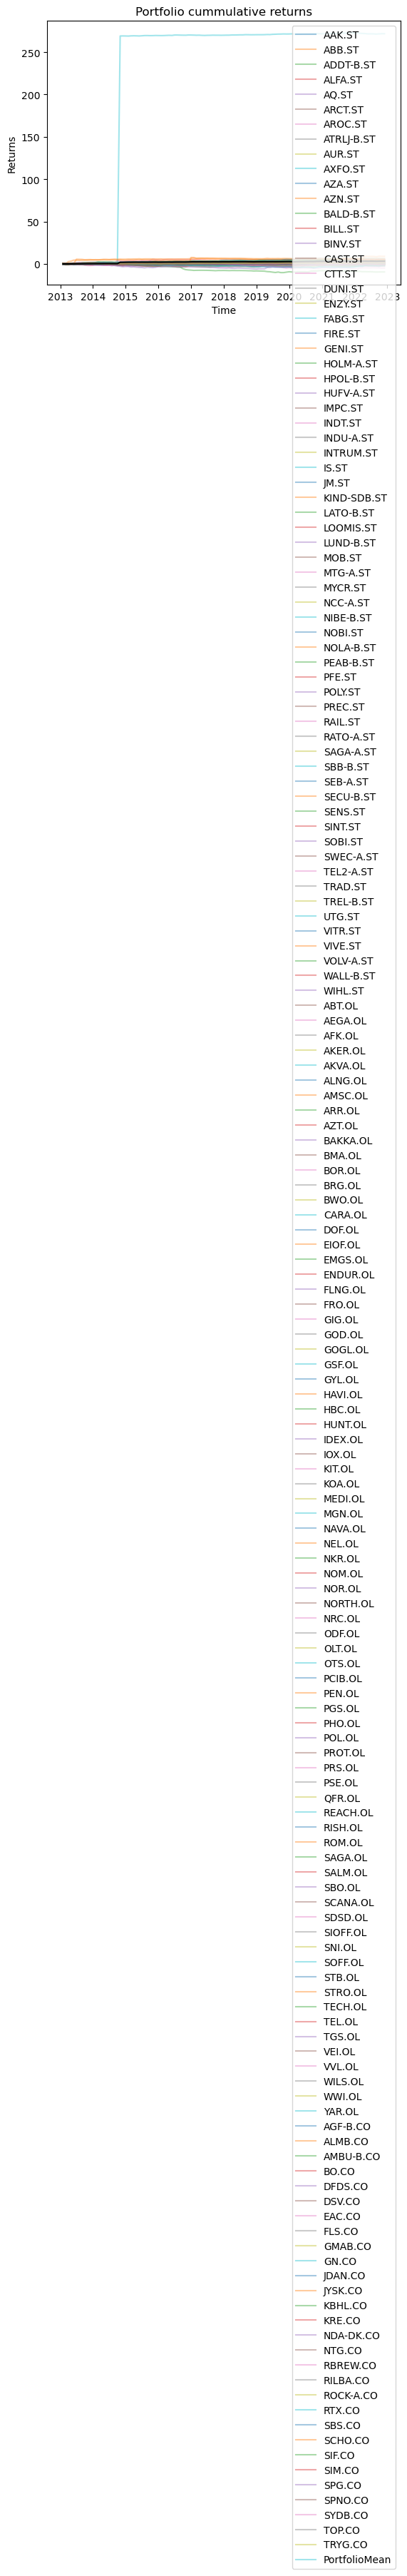

In [75]:
plot_cummulative_portfolio_returns(df)

In [74]:
cov

,AAK.ST,ABB.ST,ADDT-B.ST,ALFA.ST,AQ.ST,ARCT.ST,AROC.ST,ATRLJ-B.ST,AUR.ST,AXFO.ST,...,RTX.CO,SBS.CO,SCHO.CO,SIF.CO,SIM.CO,SPG.CO,SPNO.CO,SYDB.CO,TOP.CO,TRYG.CO
AAK.ST,2181.347977,1991.668650,2096.861584,2620.134509,3133.300431,1.206783,-94.842965,1697.879770,-60.640725,2816.262181,...,2419.121552,-311.294268,5793.124134,179.788250,9473.196704,4790.987799,511.696253,819.425218,3595.149412,1373.501930
ABB.ST,1991.668650,2850.527798,2675.920794,3271.286903,3874.841047,0.274911,-102.501607,1619.639307,-57.386726,3146.951818,...,2026.751912,-323.224993,5871.668562,186.868146,7780.676792,5250.433574,756.687600,1767.205883,3729.035883,1122.104689
ADDT-B.ST,2096.861584,2675.920794,2810.694503,3264.413358,3610.199865,0.873584,-104.973885,1628.401534,-48.728096,3181.922544,...,1961.933208,-356.095495,5326.388356,175.039967,8578.041477,5211.099354,651.227388,1378.920690,3840.188900,1141.415079
ALFA.ST,2620.134509,3271.286903,3264.413358,4332.242604,4448.544200,1.985958,-134.549529,2133.573175,-80.199464,3749.415759,...,2600.302600,-403.808086,7170.524220,240.277496,10696.627394,6729.562672,836.732056,1769.574403,4923.630093,1539.686447
AQ.ST,3133.300431,3874.841047,3610.199865,4448.544200,6266.068994,-0.233225,-134.458909,2608.665701,-88.700941,4502.457407,...,3691.145008,-444.421424,10491.425553,289.142384,13128.896960,8161.245909,1101.352095,2448.414210,5265.066016,1838.829045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPG.CO,4790.987799,5250.433574,5211.099354,6729.562672,8161.245909,4.005250,-230.352675,3851.035405,-137.155758,6429.880066,...,5702.841965,-708.862815,15057.793089,448.187337,20800.243539,12577.068558,1380.315268,2760.879102,8389.889767,2915.648050
SPNO.CO,511.696253,756.687600,651.227388,836.732056,1101.352095,-0.907814,-23.381506,445.156034,-27.421839,886.853028,...,582.092596,-64.251814,1807.838772,58.845214,1763.117284,1380.315268,270.142352,663.210439,1030.968980,349.295204
SYDB.CO,819.425218,1767.205883,1378.920690,1769.574403,2448.414210,-3.307249,-27.969626,733.434468,-71.022301,1869.720984,...,906.985444,-108.107384,3709.512538,111.233758,2000.271843,2760.879102,663.210439,2080.667417,1932.874944,531.354442
TOP.CO,3595.149412,3729.035883,3840.188900,4923.630093,5265.066016,1.822625,-196.267183,2829.523020,-134.783755,5220.655175,...,3706.981861,-570.806205,9170.400555,352.284541,14270.052803,8389.889767,1030.968980,1932.874944,7121.963727,2538.635133


In [60]:
ret = portfolio_return(df, np.array([0.2, 0.2, 0.2, 0.2, 0.2]))

In [ ]:
w = pd.DataFrame()

In [62]:
cov = portfolio_covariance(df)

In [63]:
cov

,AUR.ST,AXFO.ST,AZA.ST,AZN.ST,BALD-B.ST
AUR.ST,7.856263,-97.399462,-65.150967,-403.500384,-29.235394
AXFO.ST,-97.399462,4457.882142,4537.983842,18766.663646,1507.758391
AZA.ST,-65.150967,4537.983842,7006.719312,19468.272983,1951.377265
AZN.ST,-403.500384,18766.663646,19468.272983,84096.993876,6296.107357
BALD-B.ST,-29.235394,1507.758391,1951.377265,6296.107357,727.844049


In [56]:
mean = portfolio_mean(df)
std = portfolio_std(cov, )

In [64]:
portfolio_sharp_ratio(df, np.array([0.2, 0.2, 0.2, 0.2, 0.2]), cov)

array([0.82742318, 0.80989336, 0.86640165, 0.90495157, 0.90721478,
       0.85011152, 0.88979865, 0.87889988, 0.91433894, 0.95198494,
       1.02323156, 1.0302988 , 1.10392403, 1.19388893, 1.14685898,
       1.34661964, 1.29936767, 1.33490123, 1.33444114, 1.3888693 ,
       1.37706494, 1.43972332, 1.48082833, 1.47868802, 1.59463892,
       1.57607653, 1.60025791, 1.60816253, 1.61155466, 1.48383705,
       1.6587316 , 1.5519046 , 1.54270499, 1.60798648, 1.7251986 ,
       1.68076645, 1.59936282, 1.48493699, 1.44132789, 1.45200098,
       1.53034962, 1.56477753, 1.71734683, 1.67904493, 1.7093626 ,
       1.56952112, 1.4984901 , 1.53568197, 1.49018792, 1.60927332,
       1.67571138, 1.66785831, 1.80616939, 1.74192992, 1.54781365,
       1.51053524, 1.68108157, 1.73961301, 1.72255076, 1.76464512,
       1.76470572, 1.76813969, 1.80973921, 1.93281488, 2.01456846,
       1.99855739, 2.11965643, 2.14888474, 2.13153563, 2.17142273,
       2.19625093, 2.04997342, 2.04743119, 2.28974161, 2.27604

In [57]:
std

89.47917080443054

In [ ]:
calculate_var(mean, )

In [23]:
df

,AAK.ST,ABB.ST,ACAD.ST,ADDT-B.ST,AEC.ST
Date,,,,,
2013-01-01,39.085587,131.374847,NaN,12.098851,NaN
2013-02-01,43.772968,141.643036,NaN,13.443170,NaN
2013-03-01,47.450771,142.122849,NaN,13.568222,NaN
2013-04-01,49.037266,141.259155,NaN,13.849592,NaN
2013-05-01,50.263199,141.905060,NaN,13.880856,NaN
...,...,...,...,...,...
2022-08-01,163.500000,293.899994,45.022633,148.417679,2.870
2022-09-01,147.350006,281.307312,46.505413,147.399994,2.600
2022-10-01,161.000000,306.799988,45.504055,133.600006,2.895


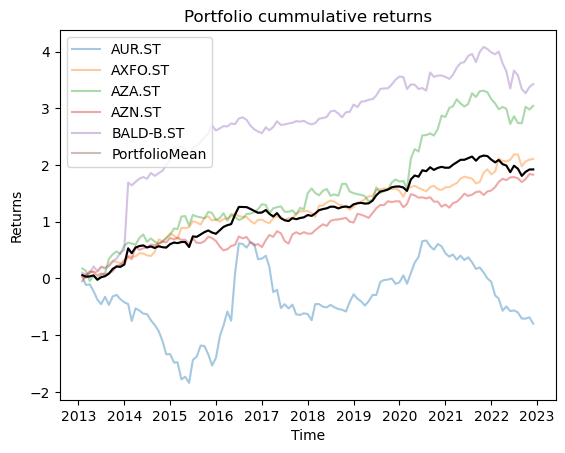

In [46]:
plot_cummulative_portfolio_returns(df)

In [47]:
portfolio_mean(df)

AUR.ST         4.422375
AXFO.ST      145.331522
AZA.ST       101.977846
AZN.ST       696.057128
BALD-B.ST     43.417847
dtype: float64

In [48]:
cov = portfolio_covariance(df)

In [49]:
bounds = Bounds(-2, 5)

#Create x0, the first guess at the values of each asset's weight.
w0 = np.linspace(start=1, stop=0, num=cov.shape[1])
x0 = w0/np.sum(w0)
# All weights between 0 and 1
# # The second boundary is the sum of weights.
linear_constraint = LinearConstraint(np.ones((cov.shape[1],), dtype=int),1,1)
#options = {'xtol': 1e-07, 'gtol': 1e-07, 'barrier_tol': 1e-07, 'maxiter': 1000}
 

In [50]:
def portfolio_minimize_risk(port_return, 
                                port_covariance, 
                                esg_data, 
                                x0,
                                linear_constraint, 
                                bounds, 
                                options = None):
    """
    Function that will take different inputs including esg score data and compute the minimum risk of different portfolios 
    :param: A dataframe of the portfolio covariance matrix
    :param: A dataframe of esg scores of the different assets in portfolio
    :param: x0 argument that is the initial guess for the minimizer
    :param: Linear constraints for the minimizer
    :param: Bounds for the minimizer
    :param: 
    :param: Options for the minimizer
    :returns: A dataframe containing portfolio weight choice for minimizing portfolio risk using esg scores
    """
    
    results = {'esg':[],
               'weights':[],
               'risk':[],
               'return':[]}
    
    function = lambda weight: portfolio_std(port_cov=port_covariance, weights=weight)
    constraint_esg = {'type': 'eq', 'fun': lambda weight: np.dot(weight, esg_data)}
    result = minimize(function, 
                      x0, 
                      method='trust-constr', 
                      bounds=bounds, 
                      constraints=[linear_constraint, constraint_esg], 
                      options=options)
   
    optimal_weights = list(result['x'])
    print(optimal_weights)
    optimal_esg = np.dot(optimal_weights, esg_data)
    results['esg'].append(optimal_esg)
    results['weights'].append(optimal_weights)
    results['risk'].append(result['fun'])
    results['return'].append(np.dot(optimal_weights, port_return.sum()))

    return results


In [51]:
portfolio_minimize_risk(df, cov, df_esg, x0, linear_constraint, bounds)

ValueError: shapes (5,) and (120,5) not aligned: 5 (dim 0) != 120 (dim 0)

In [ ]:
# set the window size
window_size = 2

# make different lists to append data in every window
expected_return = []
expected_year = []

def simple_return(beginning_price, end_price):
  return ((end_price-beginning_price)/beginning_price)

def annual_return(simple_return, years_held):
  return (((simple_return+1)**(1/years_held))-1)

# setup af loop to iterate through window and make calculations
for i in range(0, 6):

  # define the rolling window
  sample_rolling_window = df[i*12:i*12+(12*window_size)]

  # calculate the expected return as a dataframe
  window_monthly_returns = pd.DataFrame()
  window_monthly_returns = sample_rolling_window
  simple_window_yearly_returns_mean = simple_return(window_monthly_returns.iloc[0], window_monthly_returns.iloc[-1])
  annual_window_return = annual_return(simple_window_yearly_returns_mean, window_size)

  # append the results of expected return and the years to list
  expected_return.append(annual_window_return)

# make list of expected return into a dataframe
#for x in range(2013, 2024):
#  expected_year.append(dt(x,1,1))
  
#expected_return = pd.DataFrame(expected_return, index=expected_year)

expected_return


In [ ]:
#esg_data = pd.read_excel('ESG_DATA.XLS')
#for index, row in esg_data.iterrows():
    # stockholm exchange
    if row['Isin'].startswith('SE'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.ST'
    
    # swiss exchange
    elif row['Isin'].startswith('CH0242214887'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.ST'
    elif row['Isin'].startswith('CH1122548808'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('CH'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.SW'
    
    # toroto exchange
    elif row['Isin'].startswith('CA98936C1068'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.L'
    elif row['Isin'].startswith('CA'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.TO'
    elif row['Isin'].startswith('GB'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.L'
    
    # paris exchange
    elif row['Isin'].startswith('FR'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.PA'

    # copenhagen exchange
    
    elif row['Isin'].startswith('DK0060668796'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.ST'
    elif row['Isin'].startswith('DK0060520450'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('FI4000297767'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.CO' 
    elif row['Isin'].startswith('DK'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.CO'

    # oslo exchange
    elif row['Isin'].startswith('NO'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('KYG'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL' 
    elif row['Isin'].startswith('CY'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('BMG'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('MHY'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.SG'
    elif row['Isin'].startswith('US36467X2062'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('SGX'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('FO0000000179'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'

    elif row['Isin'].startswith('MT0000580101'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.DE'
    elif row['Isin'].startswith('MT0001390104'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.ST'
    elif row['Isin'].startswith('MT'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.SG'
   